In [61]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display


# audio plot 
from scipy.io import wavfile as wav
import IPython.display as ipd

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,GlobalAveragePooling2D, Dropout

In [62]:
path = "C:\\Users\\Blu-Ray\\Desktop\\archive\\cats_dogs"
path_train = path+'train'
path_test = path+'test'
path__="C:\\Users\\Blu-Ray\\Desktop\\archive\cats_dogs"
p_train = "C:\\Users\\Blu-Ray\\Desktop\\archive\\cats_dogs\\train"
p_test = "C:\\Users\\Blu-Ray\\Desktop\\archive\\cats_dogs\\test"

In [63]:
#ِsearch for all audios with .wav extension
data_train = list(glob.glob(p_train+'/**/*.wav'))
data_test = list(glob.glob(p_test+'/**/*.wav'))

In [64]:
#until x : splits the path into path and file name , (0) : gives the directory path containing the file , [1] : gives the directory name cat or dog y3ni 
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], data_train))
file_path = pd.Series(data_train, name='File_Path').astype(str) # convert the list into pandas series
labels = pd.Series(labels, name='Labels')# convert the labels into pandas series
data = pd.concat([file_path, labels], axis=1) # concat the both into one dataframe
data = data.sample(frac=1).reset_index(drop=True)#shuffle 
data.head()

File_Path Labels
0  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    dog
1  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    cat
2  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    dog
3  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    cat
4  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    cat

In [65]:
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], data_train))

In [66]:
file_path = pd.Series(data_train, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

File_Path Labels
0  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    cat
1  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    dog
2  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    cat
3  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    dog
4  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    dog

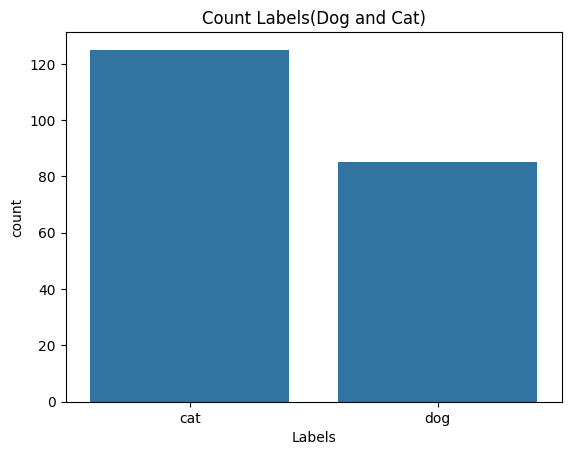

Labels
cat    125
dog     85
Name: count, dtype: int64

In [67]:
sns.countplot(x='Labels', data=data)
plt.title('Count Labels(Dog and Cat)')
plt.show()
data['Labels'].value_counts()

In [68]:
data.head()

File_Path Labels
0  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    cat
1  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    dog
2  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    cat
3  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    dog
4  C:\Users\Blu-Ray\Desktop\archive\cats_dogs\tra...    dog

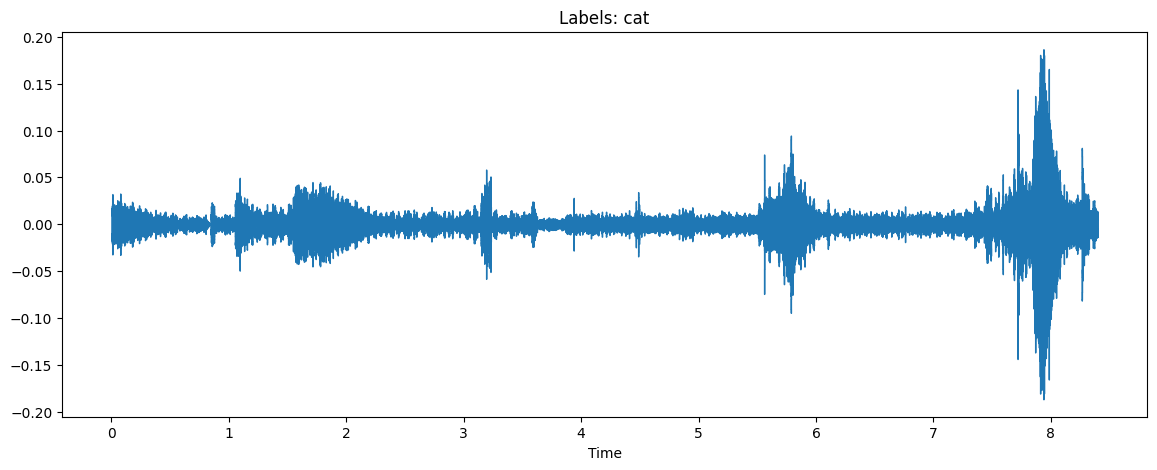

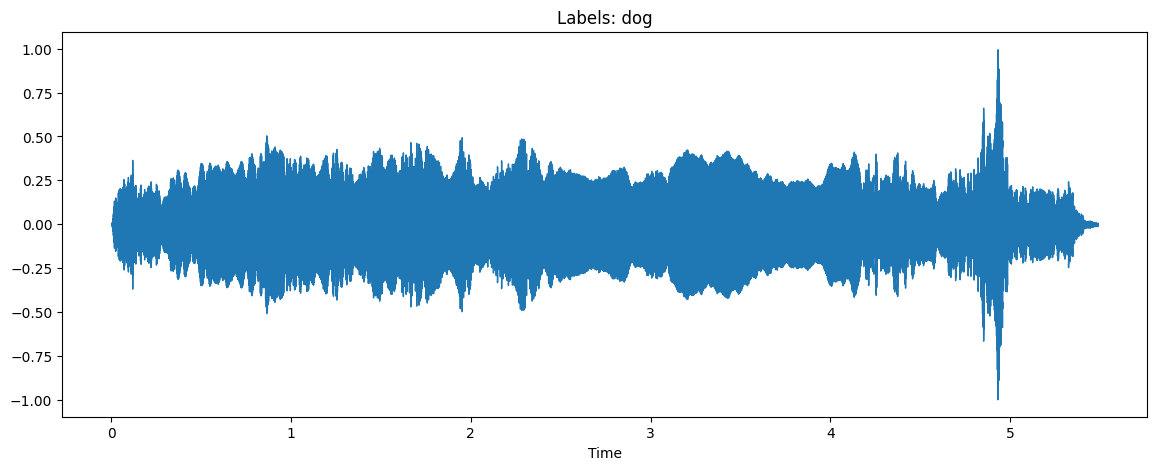

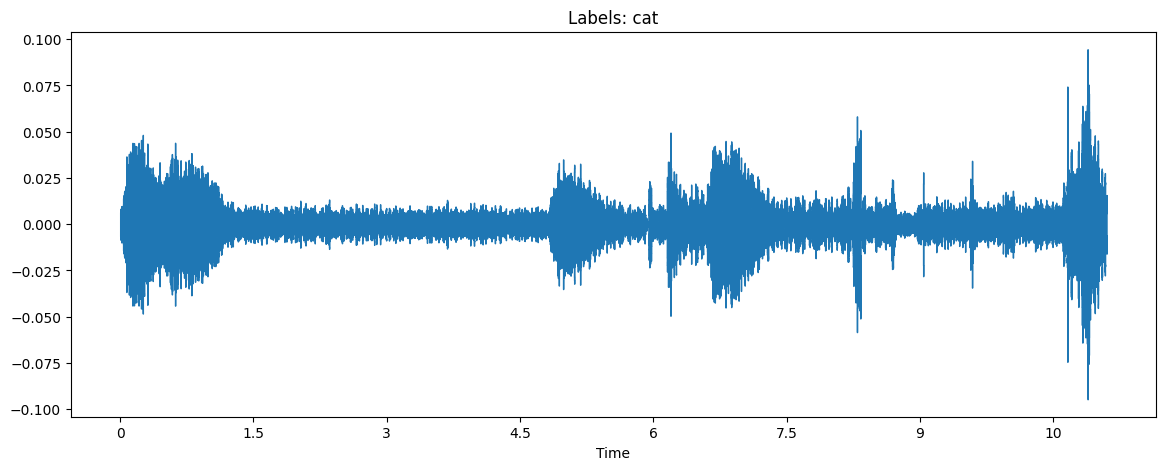

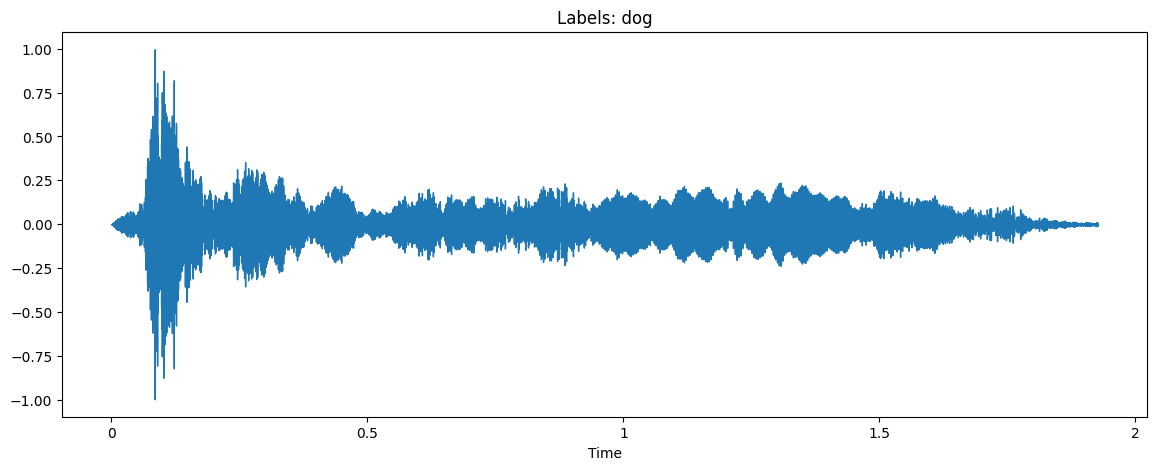

In [69]:
for i in range(4):
    x, sr = librosa.load(data.File_Path[i])
    plt.figure(figsize=(14,5))
    plt.title('Labels: '+str(data['Labels'][i]))
    librosa.display.waveshow(x, sr=sr)

C:\Users\Blu-Ray\AppData\Local\Temp\ipykernel_93096\945874929.py:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  S_db = librosa.amplitude_to_db(S, ref=np.max)  # Convert to decibels for better visualization


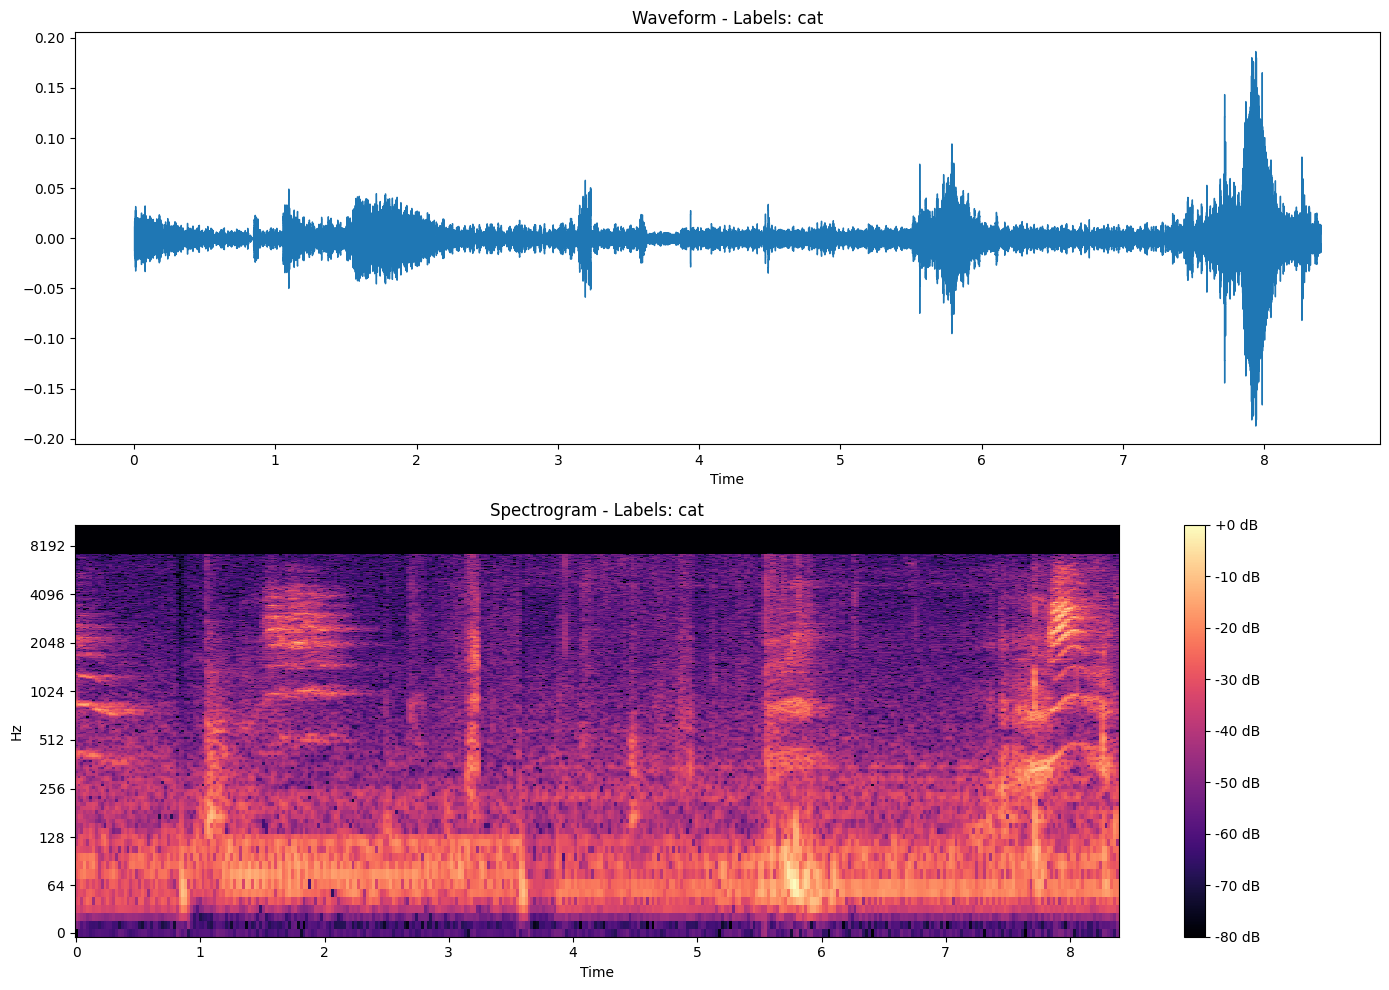

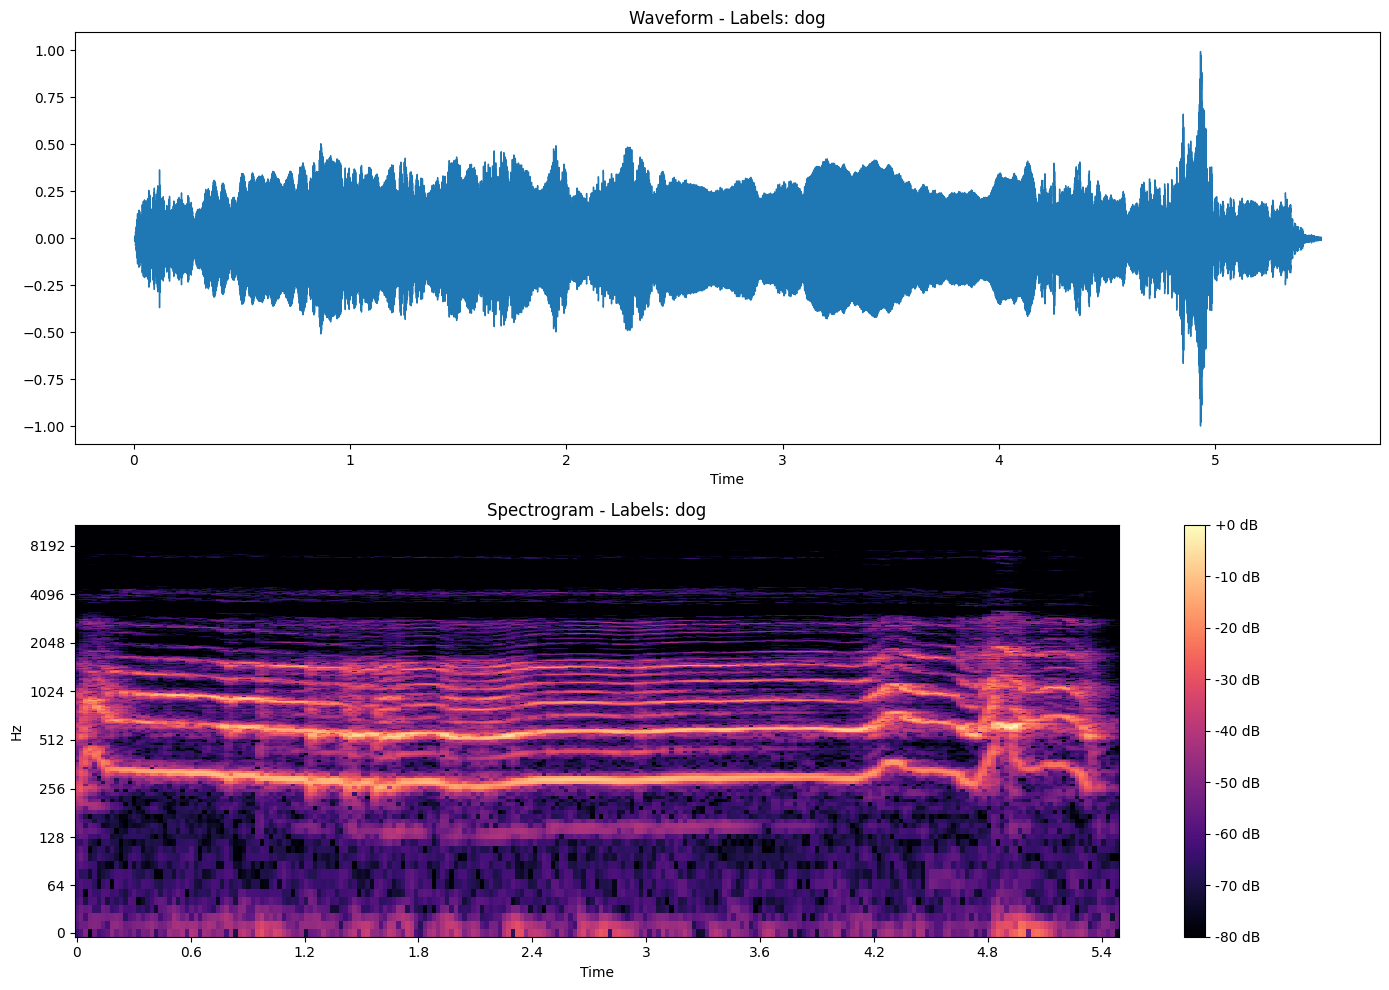

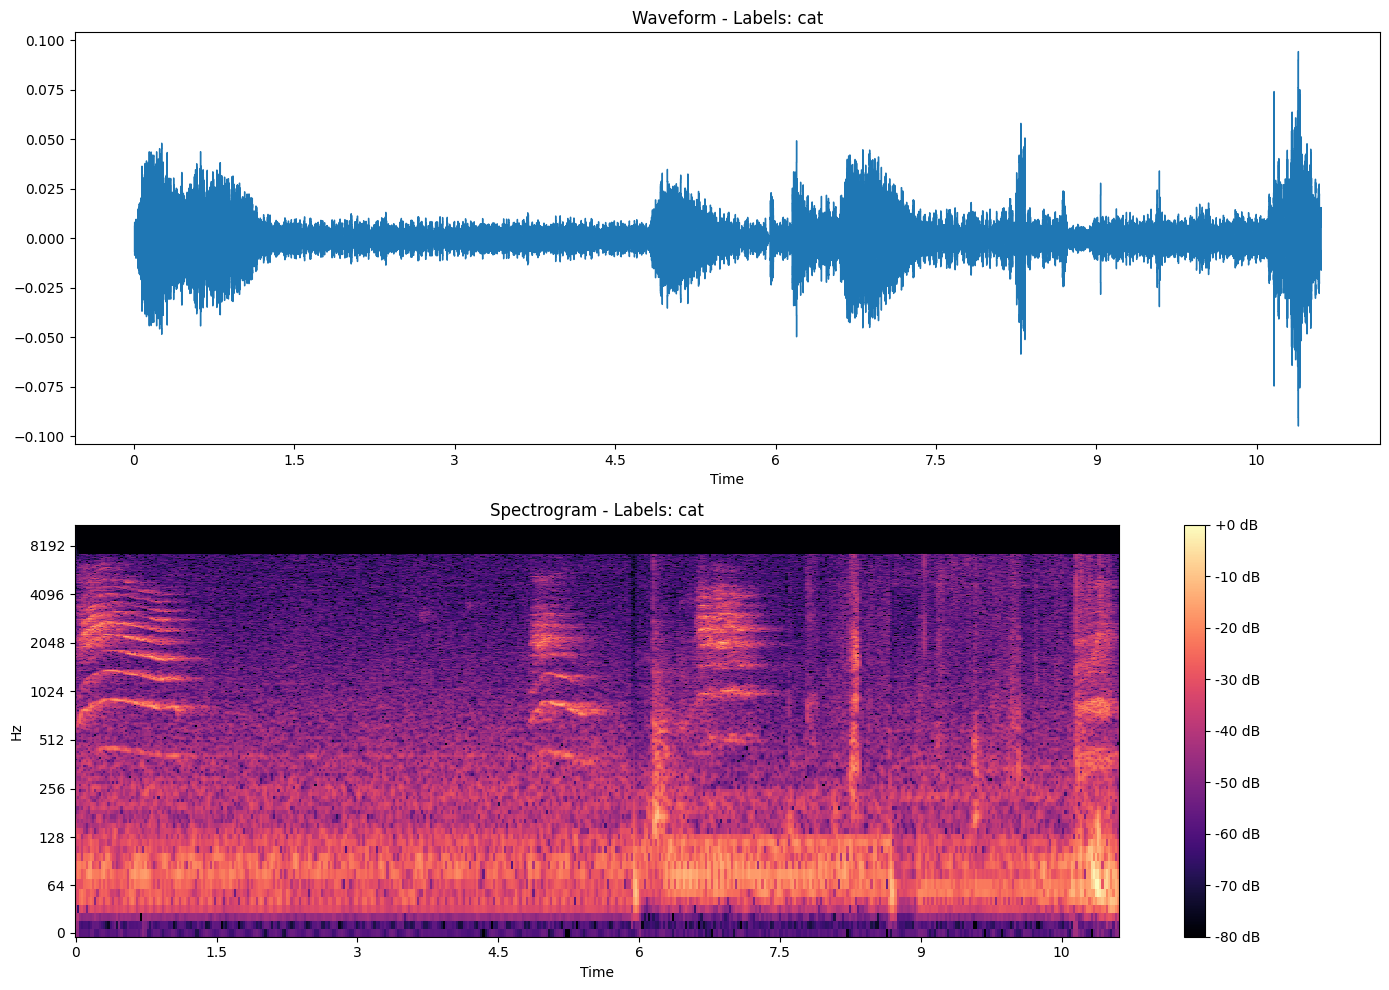

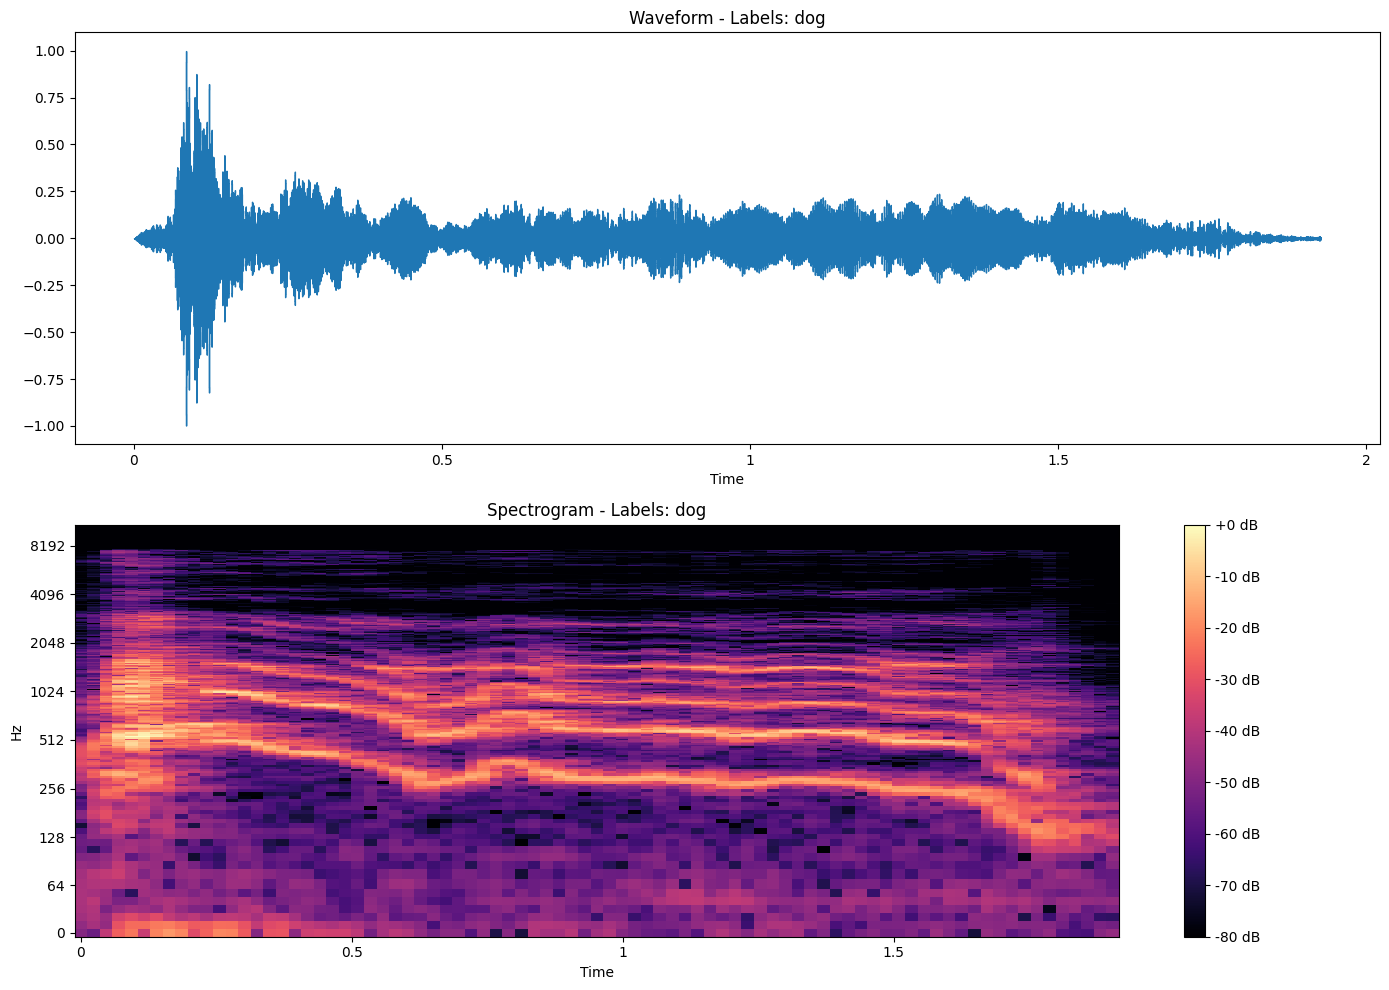

In [70]:
for i in range(4):
    # Load the audio file
    x, sr = librosa.load(data.File_Path[i])
    
    # Create a figure for the waveform and spectrogram
    plt.figure(figsize=(14, 10))
    
    # Plot the waveform
    plt.subplot(2, 1, 1)
    plt.title('Waveform - Labels: ' + str(data['Labels'][i]))
    librosa.display.waveshow(x, sr=sr)
    
    # Compute and plot the spectrogram
    plt.subplot(2, 1, 2)
    plt.title('Spectrogram - Labels: ' + str(data['Labels'][i]))
    S = librosa.stft(x)  # Short-Time Fourier Transform
    S_db = librosa.amplitude_to_db(S, ref=np.max)  # Convert to decibels for better visualization
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

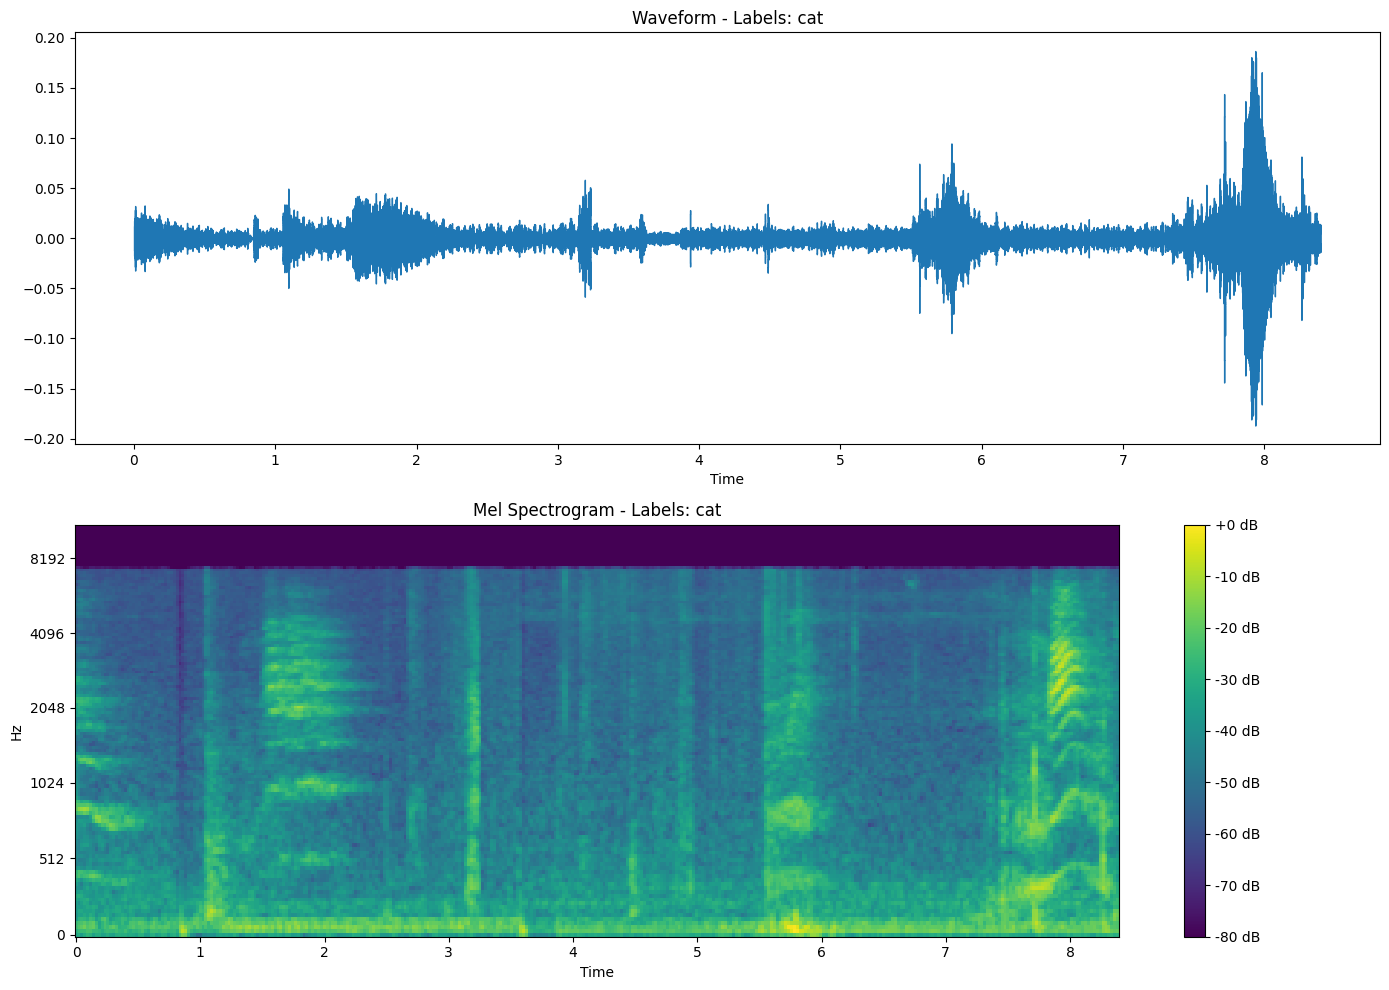

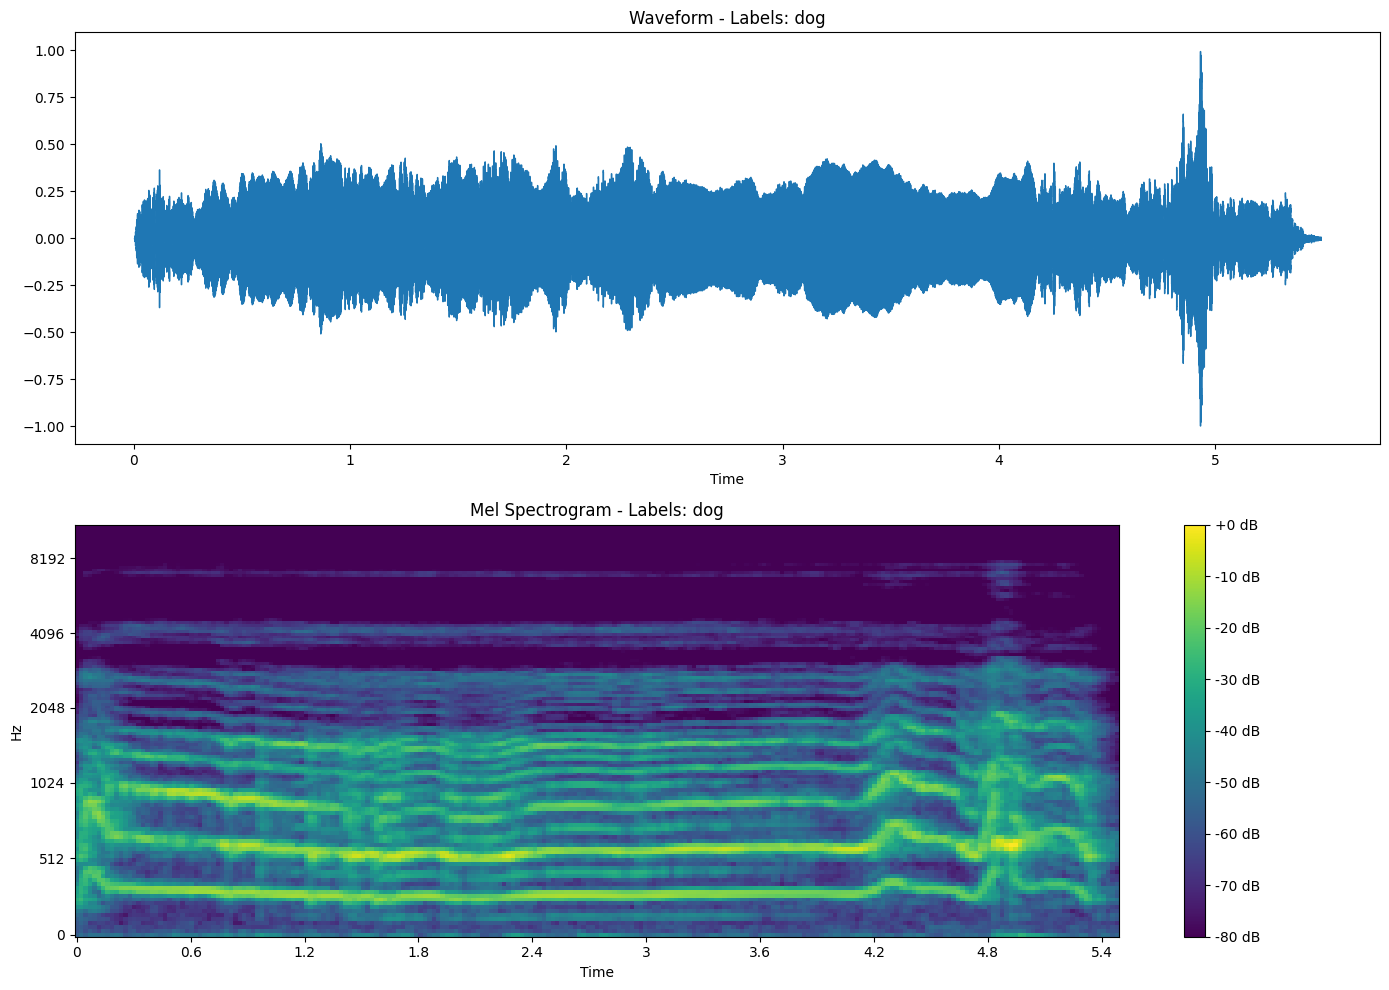

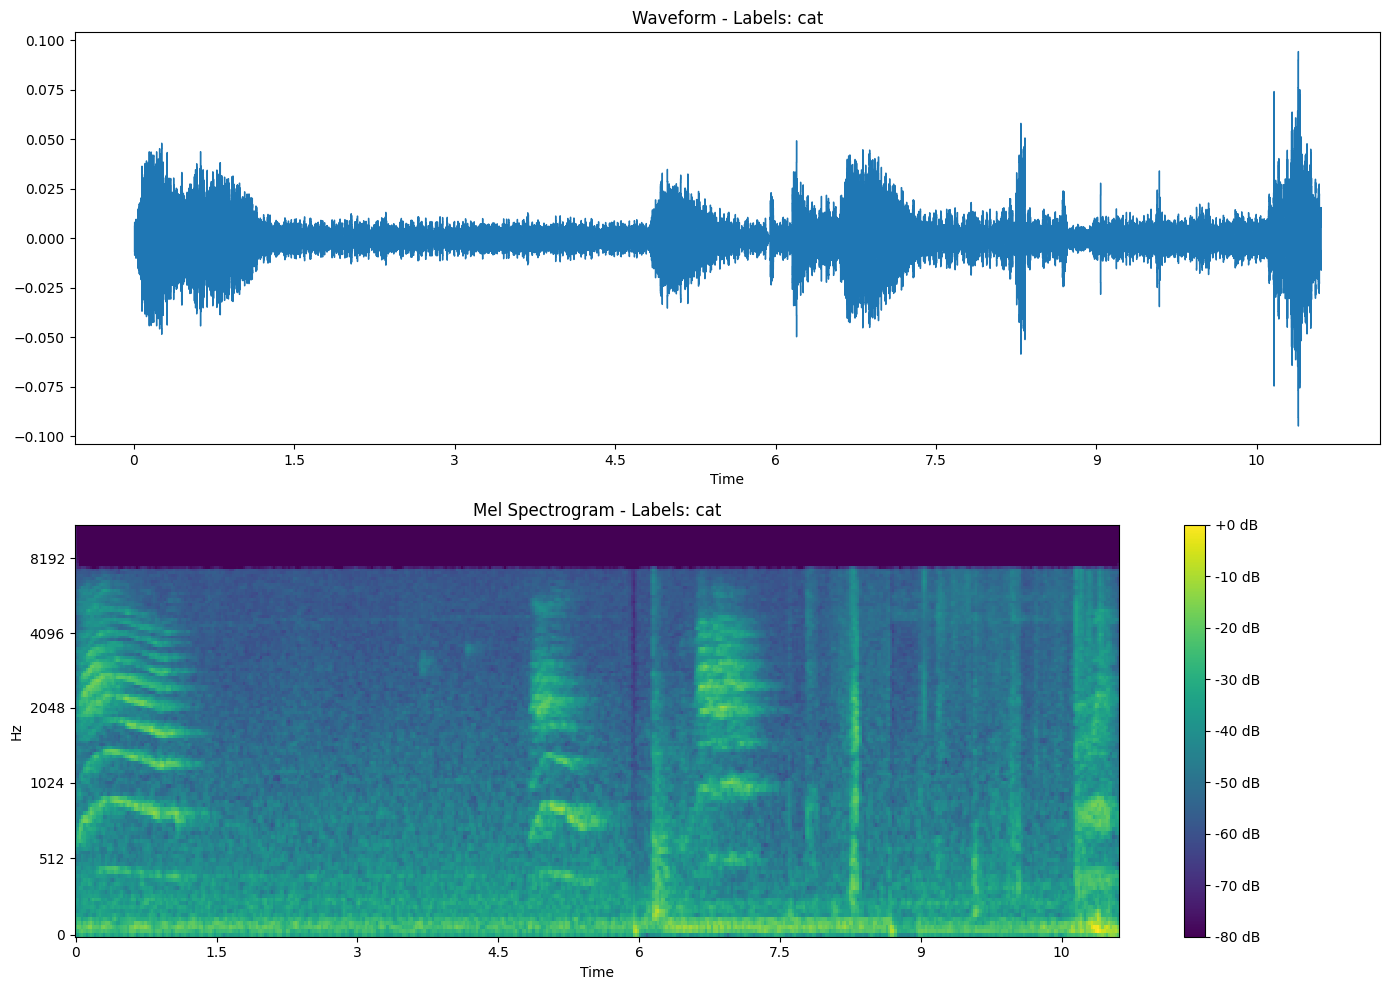

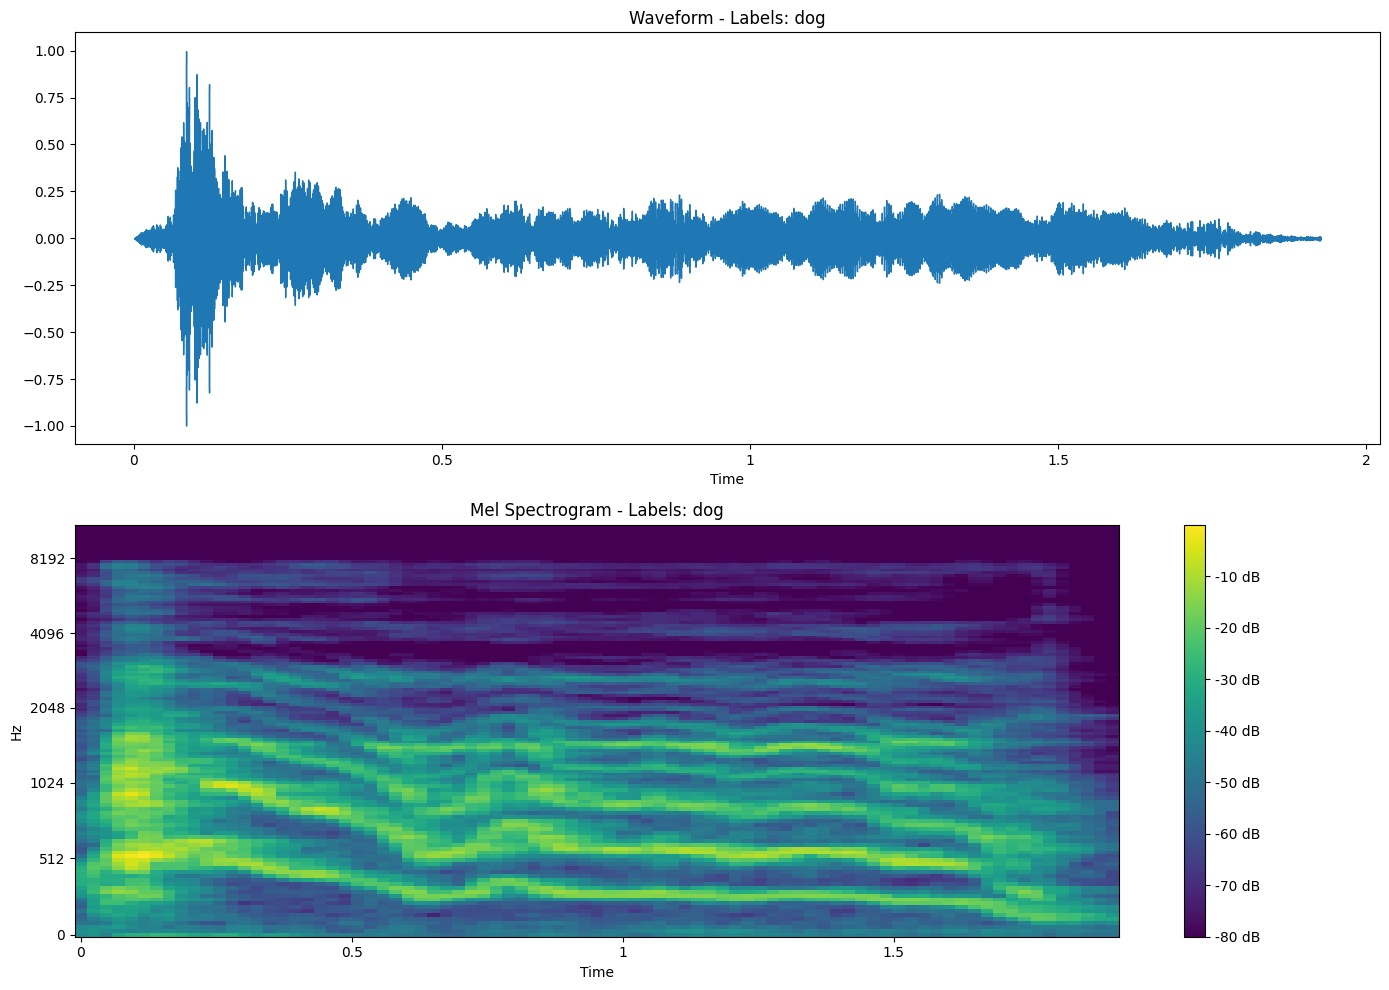

In [71]:
#Displays the frequency content of the audio signal over time, using the Mel scale.
for i in range(4):
    # Load the audio file
    x, sr = librosa.load(data.File_Path[i])
    
    # Create a figure for the waveform and Mel spectrogram
    plt.figure(figsize=(14, 10))
    
    # Plot the waveform
    plt.subplot(2, 1, 1)
    plt.title('Waveform - Labels: ' + str(data['Labels'][i]))
    librosa.display.waveshow(x, sr=sr)
    
    # Compute and plot the Mel spectrogram
    plt.subplot(2, 1, 2)
    plt.title('Mel Spectrogram - Labels: ' + str(data['Labels'][i]))
    mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to decibels
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    
    # Display the plots
    plt.tight_layout()
    plt.show()


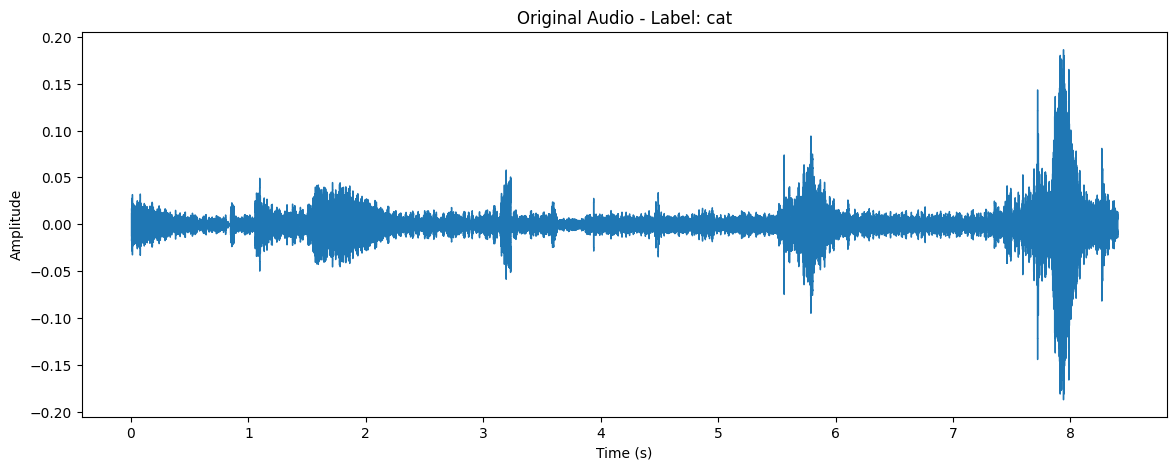

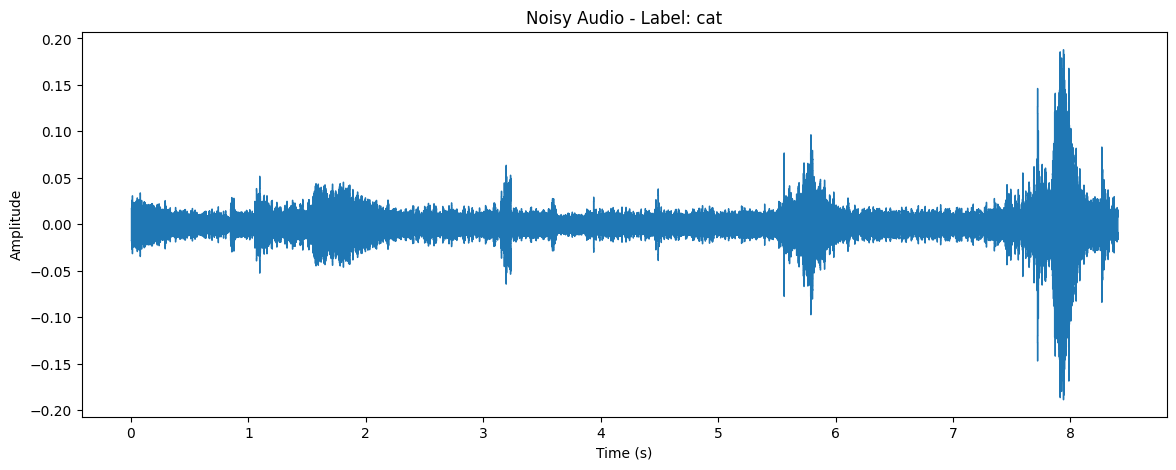

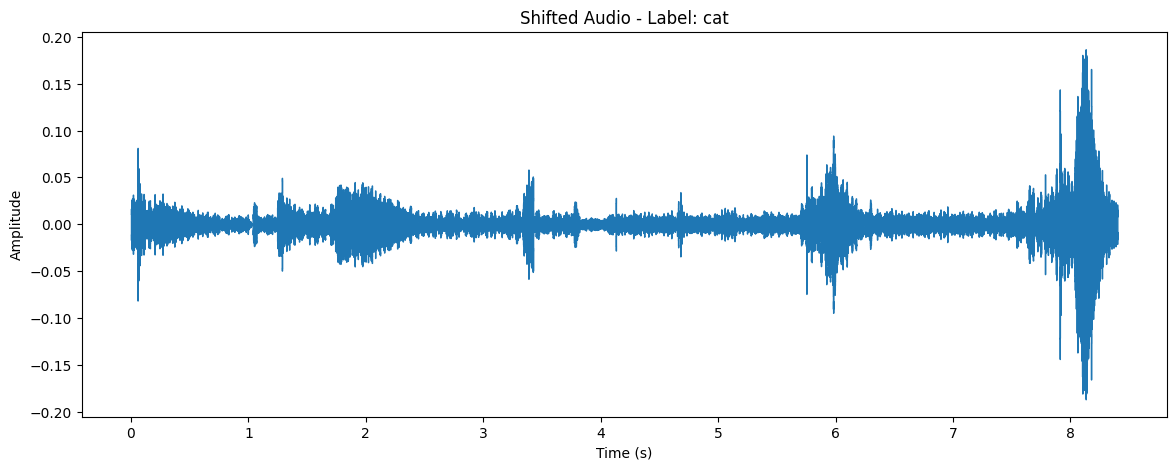

In [72]:
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display

def noise_injection(data):
    noise_ampl = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_ampl * np.random.normal(size=data.shape[0])
    return data

def time_shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)  # milliseconds
    return np.roll(data, shift_range)

def plot_audio(x, sr, title):
    plt.figure(figsize=(14, 5))
    plt.title(title)
    librosa.display.waveshow(x, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def process_and_plot_audio(file_path, label):
    x, sr = librosa.load(file_path)
    
    # Original audio
    plot_audio(x, sr, f'Original Audio - Label: {label}')
    display(Audio(x, rate=sr))
    
    # Noise injection
    x_noisy = noise_injection(x)
    plot_audio(x_noisy, sr, f'Noisy Audio - Label: {label}')
    display(Audio(x_noisy, rate=sr))
    
    # Time shifting
    x_shifted = time_shift(x)
    plot_audio(x_shifted, sr, f'Shifted Audio - Label: {label}')
    display(Audio(x_shifted, rate=sr))

# Example usage
file_path = data.File_Path[0]  
label = data['Labels'][0]  
process_and_plot_audio(file_path, label)


In [73]:
data.File_Path[2]

'C:\\Users\\Blu-Ray\\Desktop\\archive\\cats_dogs\\train\\cat\\cat_117.wav'

In [74]:
ipd.Audio(data.File_Path[1])

In [75]:
ipd.Audio(data.File_Path[0])

In [76]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') # kaiser is resampling method , optimize speed
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)  # no.of mel frequincy to extract 
    mfccs_processed = np.mean(mfccs.T,axis=0) # compute the mean
    return mfccs_processed

In [77]:
features = []
for index, row in data.iterrows():
    file_name = str(row['File_Path'])
    class_label = row["Labels"]
    data_ = extract_features(file_name)
    features.append([data_, class_label])

In [78]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
featuresdf.head()

feature class_label
0  [-411.00198, 120.51641, -31.508547, 65.57545, ...         cat
1  [-283.5367, 162.7024, -31.656101, -39.140324, ...         dog
2  [-426.68005, 120.50465, -28.993336, 60.59801, ...         cat
3  [-313.4831, 176.6825, -37.360775, -38.759003, ...         dog
4  [-326.47006, 159.18903, -35.869106, -39.25245,...         dog

In [79]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

In [80]:
X.shape, y.shape

((210, 40), (210,))

In [81]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [83]:
model = Sequential()
model.add(Dense(64, input_dim=40,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                2624      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 46)                2990      
                                                                 
 dropout_7 (Dropout)         (None, 46)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                1504      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                

In [84]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

In [85]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[earlystop], epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 77ms/step - loss: 13.7250 - accuracy: 0.5298 - val_loss: 9.7204 - val_accuracy: 0.3571
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 11.6959 - accuracy: 0.4702 - val_loss: 5.6447 - val_accuracy: 0.4286
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 7.8685 - accuracy: 0.4821 - val_loss: 1.7010 - val_accuracy: 0.3571
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 5.6885 - accuracy: 0.5060 - val_loss: 2.8280 - val_accuracy: 0.6667
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 5.0628 - accuracy: 0.5655 - val_loss: 2.0639 - val_accuracy: 0.6429
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 5.1837 - accuracy: 0.5119 - val_loss: 1.2454 - val_accuracy: 0.7143
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 4.2596 - accuracy: 0.6012 - val_loss: 1.3738 - val_accuracy: 0.5952
Epoch 8/100
6/6 [=

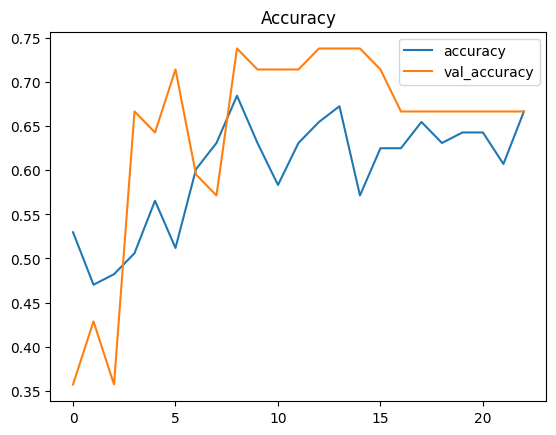

In [86]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

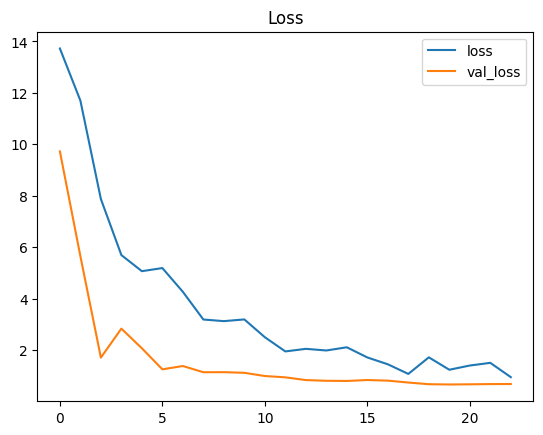

In [87]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [88]:
# Evaluating The Model
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))

Training Accuracy: 77.98%
Testing Accuracy: 66.67%


2/2 [==============================] - 0s 6ms/step


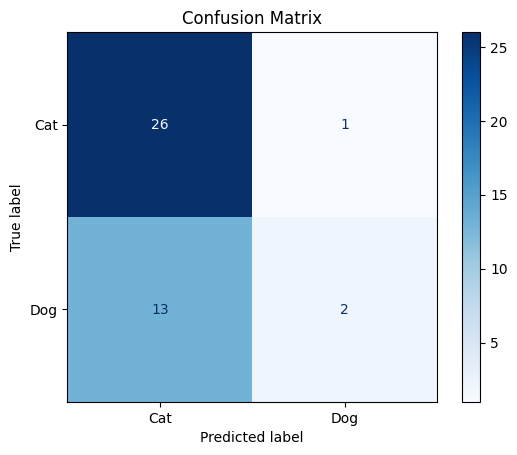

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

#  Convert the actual labels back to class labels
y_true = np.argmax(y_test, axis=1)

#  Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

#  Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [89]:
def prediction_(path_sound):
    data_sound = extract_features(path_sound)
    X = np.array(data_sound)
    X = X.reshape(1,40)
    pred_ = model.predict(X)
    pred_ = np.argmax(pred_,axis=1)
    pred_class = le.inverse_transform(pred_)
    print("The predicted class is:\033[01m ", pred_class[0],'\033[0m \n')

In [90]:
path_sound = "C:\\Users\\Blu-Ray\\Desktop\\archive\\cats_dogs\\test\\dog\\dog_barking_19.wav"
prediction_(path_sound)
ipd.Audio(path_sound)

1/1 [==============================] - 0s 108ms/step
The predicted class is:  dog  

